**The Student Performance Dataset. Here's how you can use these regression models step-by-step, along with visualizations of the performance. We'll work with a dataset where the goal is to predict the final grade (G3) based on the available features (such as age, study time, school, etc.).**

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Enable seaborn styling
sns.set()


In [19]:
# Load the Dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
df= pd.concat([X, y], axis=1)


In [20]:
# Show the first few rows of the dataset
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [21]:
## Data Preprocessing

# Check for missing values
df.isnull().sum()

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['G3'])  # Dropping target variable
y = df_encoded['G3']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Ridge Regression

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R2: {r2_ridge:.2f}")



Ridge Regression - MSE: 1.47, R2: 0.85


In [23]:
# Lasso Regression

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R2: {r2_lasso:.2f}")



Lasso Regression - MSE: 1.34, R2: 0.86


In [24]:
# ElasticNet Regression

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can tune alpha and l1_ratio
elasticnet.fit(X_train, y_train)
y_pred_elastic = elasticnet.predict(X_test)

# Metrics
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"ElasticNet Regression - MSE: {mse_elastic:.2f}, R2: {r2_elastic:.2f}")


ElasticNet Regression - MSE: 1.36, R2: 0.86


/tmp/ipykernel_40808/3652041482.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=results, palette="viridis")
/tmp/ipykernel_40808/3652041482.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2 Score", data=results, palette="viridis")


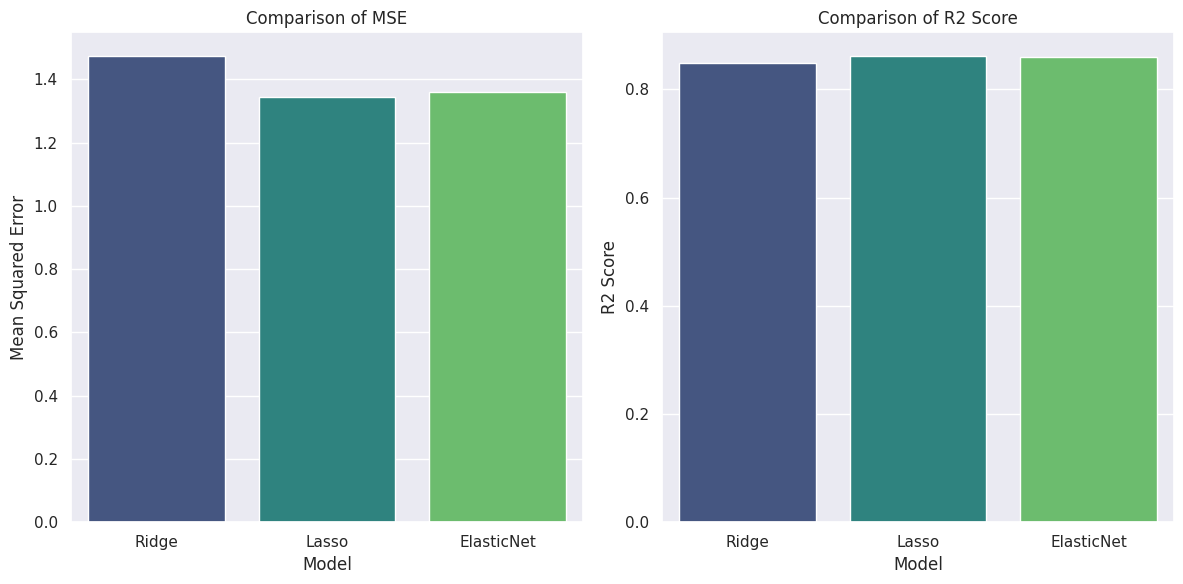

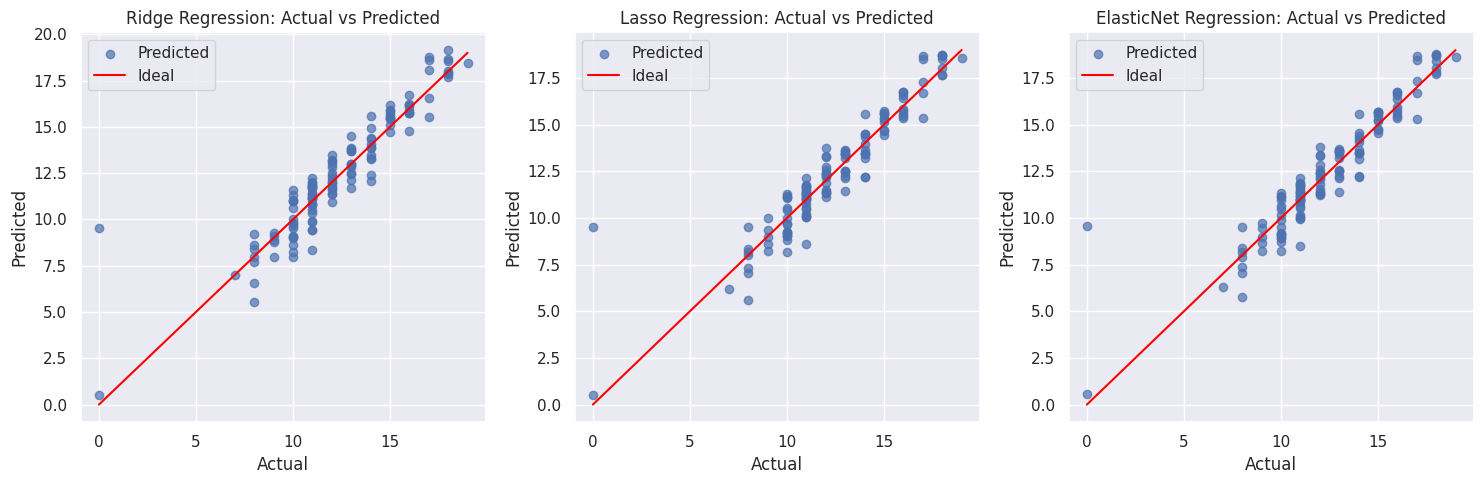

In [25]:
# Create a DataFrame for visual comparison
results = pd.DataFrame({
    "Model": ["Ridge", "Lasso", "ElasticNet"],
    "MSE": [mse_ridge, mse_lasso, mse_elastic],
    "R2 Score": [r2_ridge, r2_lasso, r2_elastic]
})

# Barplot for MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="MSE", data=results, palette="viridis")
plt.title("Comparison of MSE")
plt.ylabel("Mean Squared Error")

# Barplot for R2 Score
plt.subplot(1, 2, 2)
sns.barplot(x="Model", y="R2 Score", data=results, palette="viridis")
plt.title("Comparison of R2 Score")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.show()

# Actual vs Predicted for each model
plt.figure(figsize=(15, 5))

# Ridge
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.7, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal")
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# Lasso
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.7, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal")
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# ElasticNet
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_elastic, alpha=0.7, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal")
plt.title("ElasticNet Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

plt.tight_layout()
plt.show()


**To improve the performance of Ridge, Lasso, and ElasticNet regression models, we can tune their hyperparameters such as alpha (regularization strength) and l1_ratio (for ElasticNet). We'll use GridSearchCV to perform hyperparameter tuning and find the best combination of parameters.**

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [27]:
# Set up hyperparameter grid for Ridge Regression
ridge_params = {'alpha': [2,6,5,10,20,30,40,50,60,80,90]}

# Ridge Regression model
ridge = Ridge()

# GridSearchCV for Ridge
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best Ridge Model - Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best Ridge Model - Best MSE: {-ridge_grid.best_score_:.2f}")

# Best model prediction
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test)

# Metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R2: {r2_ridge:.2f}")


Best Ridge Model - Alpha: 90
Best Ridge Model - Best MSE: 1.67
Ridge Regression - MSE: 1.41, R2: 0.86


In [28]:
# Set up hyperparameter grid for Lasso Regression
lasso_params = {'alpha': [2,6,5,10,20,30,40,50,60,80,90]}

# Lasso Regression model
lasso = Lasso()

# GridSearchCV for Lasso
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best Lasso Model - Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best Lasso Model - Best MSE: {-lasso_grid.best_score_:.2f}")

# Best model prediction
y_pred_lasso = lasso_grid.best_estimator_.predict(X_test)

# Metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R2: {r2_lasso:.2f}")


Best Lasso Model - Alpha: 2
Best Lasso Model - Best MSE: 2.22
Lasso Regression - MSE: 1.56, R2: 0.84


In [29]:
# Set up hyperparameter grid for ElasticNet Regression
elasticnet_params = {'alpha': [2,6,5,10,20,30,40,50,60,80,90], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

# ElasticNet model
elasticnet = ElasticNet()

# GridSearchCV for ElasticNet
elasticnet_grid = GridSearchCV(elasticnet, elasticnet_params, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best ElasticNet Model - Alpha: {elasticnet_grid.best_params_['alpha']}, L1 Ratio: {elasticnet_grid.best_params_['l1_ratio']}")
print(f"Best ElasticNet Model - Best MSE: {-elasticnet_grid.best_score_:.2f}")

# Best model prediction
y_pred_elastic = elasticnet_grid.best_estimator_.predict(X_test)

# Metrics
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"ElasticNet Regression - MSE: {mse_elastic:.2f}, R2: {r2_elastic:.2f}")


Best ElasticNet Model - Alpha: 2, L1 Ratio: 0.1
Best ElasticNet Model - Best MSE: 1.91
ElasticNet Regression - MSE: 1.46, R2: 0.85


/tmp/ipykernel_40808/2560224225.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=results, palette="viridis")
/tmp/ipykernel_40808/2560224225.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2 Score", data=results, palette="viridis")


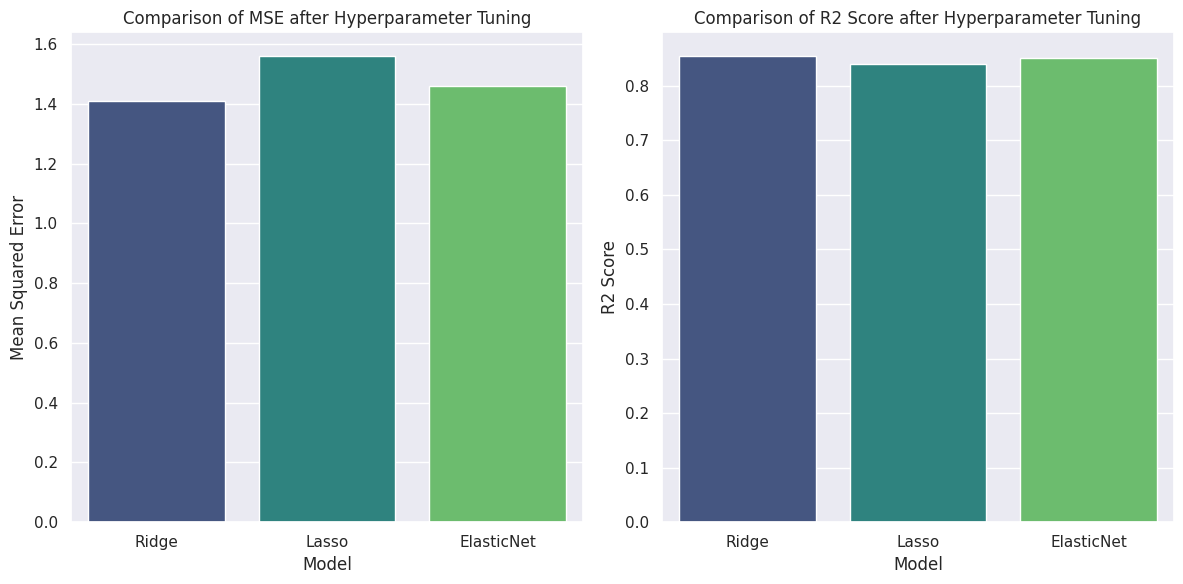

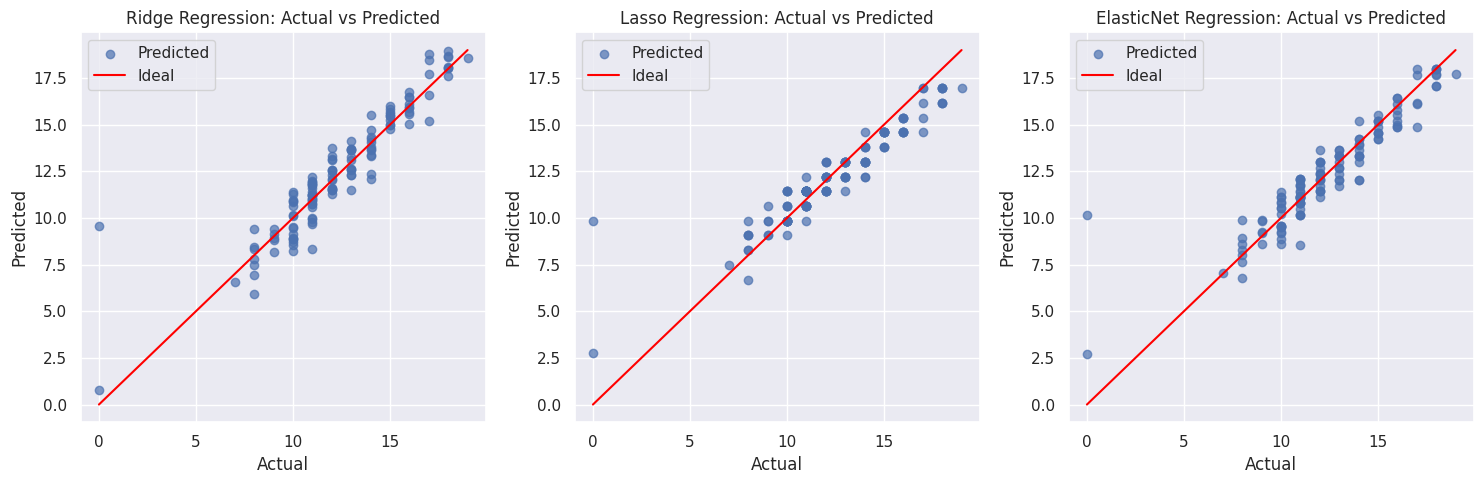

In [30]:
# Create a DataFrame for visual comparison
results = pd.DataFrame({
    "Model": ["Ridge", "Lasso", "ElasticNet"],
    "MSE": [mse_ridge, mse_lasso, mse_elastic],
    "R2 Score": [r2_ridge, r2_lasso, r2_elastic]
})

# Barplot for MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="MSE", data=results, palette="viridis")
plt.title("Comparison of MSE after Hyperparameter Tuning")
plt.ylabel("Mean Squared Error")

# Barplot for R2 Score
plt.subplot(1, 2, 2)
sns.barplot(x="Model", y="R2 Score", data=results, palette="viridis")
plt.title("Comparison of R2 Score after Hyperparameter Tuning")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.show()

# Actual vs Predicted for each model
plt.figure(figsize=(15, 5))

# Ridge
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.7, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal")
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# Lasso
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.7, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal")
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# ElasticNet
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_elastic, alpha=0.7, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal")
plt.title("ElasticNet Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

plt.tight_layout()
plt.show()


** Interpret Results
  - Hyperparameter Tuning: By tuning the alpha and l1_ratio (for ElasticNet), we can achieve better performance. The best hyperparameters found by GridSearchCV will be printed.
  - Comparison: We can compare the models by MSE (Mean Squared Error) and R² (R-squared) to determine which one performs the best after hyperparameter tuning.
  - Visualization: The scatter plots show how close the predicted values are to the actual values, and the red line represents the ideal prediction line.

- Conclusion:
  - By tuning the hyperparameters alpha and l1_ratio, we are able to improve the performance of Ridge, Lasso, and ElasticNet regression models